In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
N = 4
t = 6

individuals = np.linspace(0, N-1, N, dtype = int)+1
time        = np.linspace(0, t-1, t, dtype = int)

scatter_individuals = np.array(individuals.reshape(N,1)*np.ones((1,t)), dtype = int)

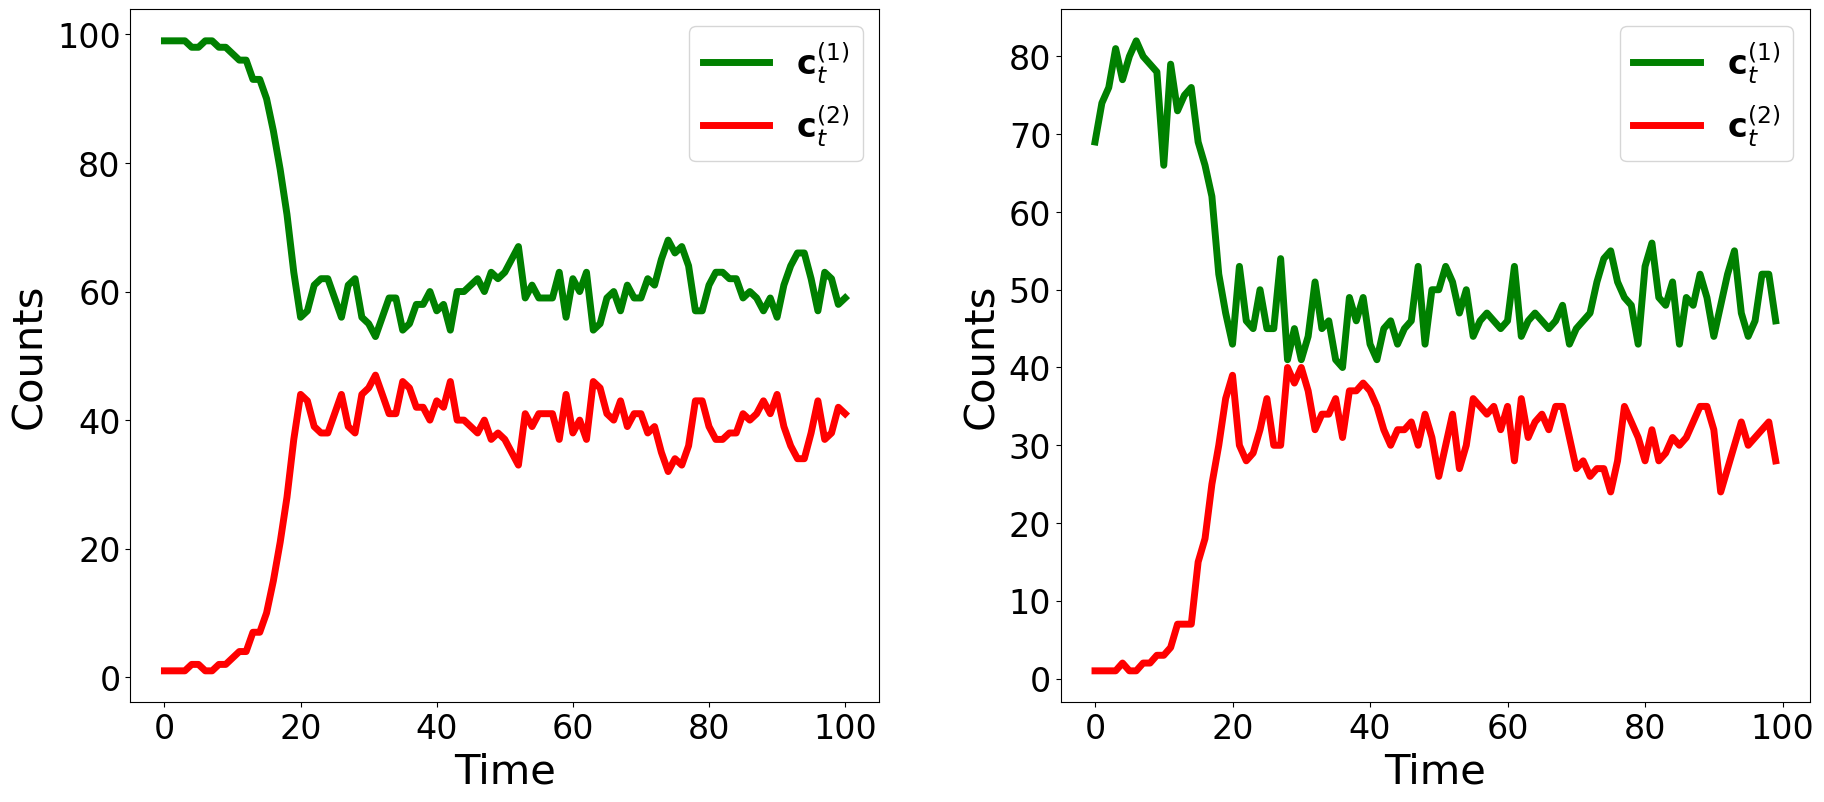

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=10)

C_true = np.load("Data/Input/C_SIS.npy")
Y_true = np.load("Data/Input/Y_SIS.npy")
color_true = ["green", "red" ]

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_ylabel(r"Counts", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

ax[1].set_ylabel(r"Counts", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

label_c = [r"$\mathbf{c}_t^{(1)}$", r"$\mathbf{c}_t^{(2)}$"]
label_o = [r"$\mathbf{o}_t^{(1)}$", r"$\mathbf{o}_t^{(2)}$"]
for i in range(2):

    ax[0].plot(np.sum(C_true, axis =0)[i, :], color = color_true[i], linewidth = 5, label = label_c[i])
    ax[1].plot(np.sum(Y_true, axis =0)[i, 1:], color = color_true[i], linewidth = 5, label = label_c[i])

ax[0].legend(fontsize = 24)
ax[1].legend(fontsize = 24)

In [4]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

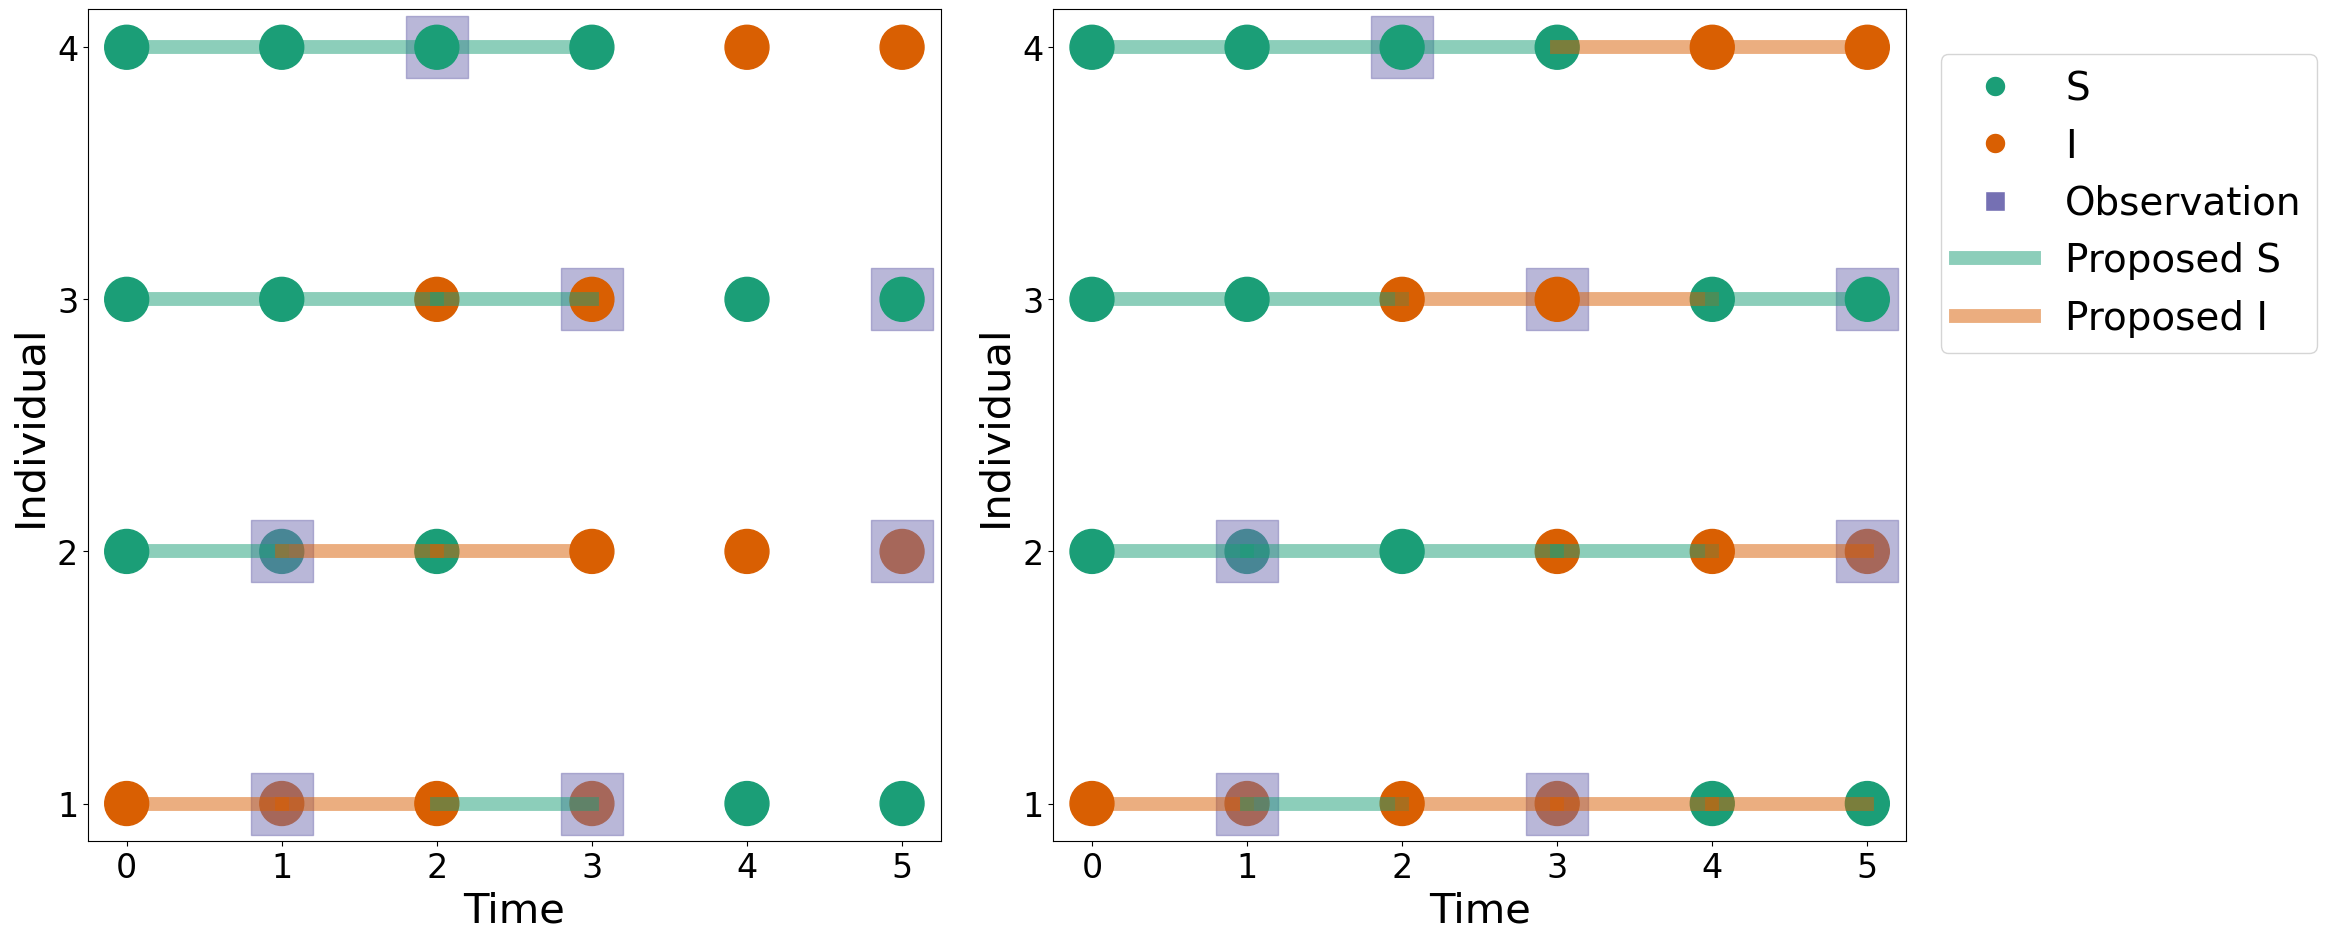

In [8]:
np.random.seed(345)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=5)

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_ylabel(r"Individual", fontsize = 30, labelpad = 5)
ax[1].set_ylabel(r"Individual", fontsize = 30, labelpad = 5)

ax[0].set_xlabel(r"Time", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

plt.setp(ax, xticks=time, yticks=individuals)

color_list_BPF = [["#d95f02",   "#d95f02",   "#1b9e77", ""],
                  ["#1b9e77", "#d95f02",   "#d95f02",   ""], 
                  ["#1b9e77", "#1b9e77", "#1b9e77", ""], 
                  ["#1b9e77", "#1b9e77", "#1b9e77", ""], 
                 ]

color_list_APF = [["#d95f02", "#1b9e77", "#d95f02",   "#d95f02",   "#d95f02",   "#1b9e77",   ], 
                  ["#1b9e77", "#1b9e77", "#1b9e77", "#1b9e77", "#d95f02", "#1b9e77", ], 
                  ["#1b9e77", "#1b9e77", "#d95f02", "#d95f02",   "#1b9e77",   "#d95f02", ], 
                  ["#1b9e77", "#1b9e77", "#1b9e77", "#d95f02", "#d95f02", "#1b9e77", ]]

color_list = [["#1b9e77", "#1b9e77", "#1b9e77", "#1b9e77", "#d95f02",   "#d95f02",   ], 
              ["#1b9e77", "#1b9e77", "#d95f02",   "#d95f02",   "#1b9e77", "#1b9e77", ], 
              ["#1b9e77", "#1b9e77", "#1b9e77", "#d95f02",   "#d95f02",   "#d95f02", ], 
              ["#d95f02",   "#d95f02",   "#d95f02",   "#d95f02",   "#1b9e77", "#1b9e77", ]]


observation_time_list        = [[1, 3], [1, 5], [3, 5], [2]]
observation_individuals_list = [[0, 0], [1, 1], [2, 2], [3]]

for n in range(N):
    for i in range(1, t-2):

        ax[0].plot(time[i-1:i+1], scatter_individuals[n,:][i-1:i+1], color = color_list_BPF[n][i-1], linewidth = 10, alpha = 0.5)
        
    for i in range(1, t):
        ax[1].plot(time[i-1:i+1], scatter_individuals[n,:][i-1:i+1], color = color_list_APF[n][i-1], linewidth = 10, alpha = 0.5)

    colors = color_list[N-n-1] #np.random.choice(a = ["#1b9e77", "#d95f02"], p = [0.8, 0.2], replace = True, size = t)
    
    ax[0].scatter(time, scatter_individuals[n,:], color = colors, s = 1000, alpha = 1)
    ax[1].scatter(time, scatter_individuals[n,:], color = colors, s = 1000, alpha = 1)

    observation_time        = np.array(observation_time_list[N-1-n], dtype = int) #np.random.choice(a = time, size = 2)
    observation_individuals = np.array(observation_individuals_list[N-1-n], dtype = int) #np.random.choice(a = scatter_individuals[n,:], size = 2)

    ax[0].scatter(observation_time, observation_individuals+1, color = "#7570b3", alpha = 0.5, marker = "s", s = 2000)
    ax[1].scatter(observation_time, observation_individuals+1, color = "#7570b3", alpha = 0.5, marker = "s", s = 2000)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='S',           markerfacecolor='#1b9e77', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='I',           markerfacecolor='#d95f02',   markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='Observation', markerfacecolor='#7570b3',  markersize=15),
                   Line2D([0], [0], color='#1b9e77', alpha = 0.5, lw=10, label='Proposed S'),
                   Line2D([0], [0], color='#d95f02',   alpha = 0.5, lw=10, label='Proposed I')]   

fig.legend(handles=legend_elements, bbox_to_anchor=(1.175, 0.9), fontsize = 28)

# ESS experiment

In [9]:
ESS_SIS_numpy = np.load("Data/ESS/ESS_SIS_numpy.npy")
ESS_SIS_numpy[np.isnan(ESS_SIS_numpy)] = 0

ESS_SIS_numpy = ESS_SIS_numpy[np.array([0,1,3,7,8,10,12]),:]

In [10]:
algorithm_list = ["BPF", "APF"]

h_list = [1, 5, 10, 20, 50]
for h in h_list:
    algorithm_list.append("h="+str(h))

color_list = ["orange", "red"]

cmap = plt.get_cmap('viridis', 5*len(h_list))
for i in range(len(h_list)):
    color_list.append(cmap(5*len(h_list)-4*(len(h_list)-i)))

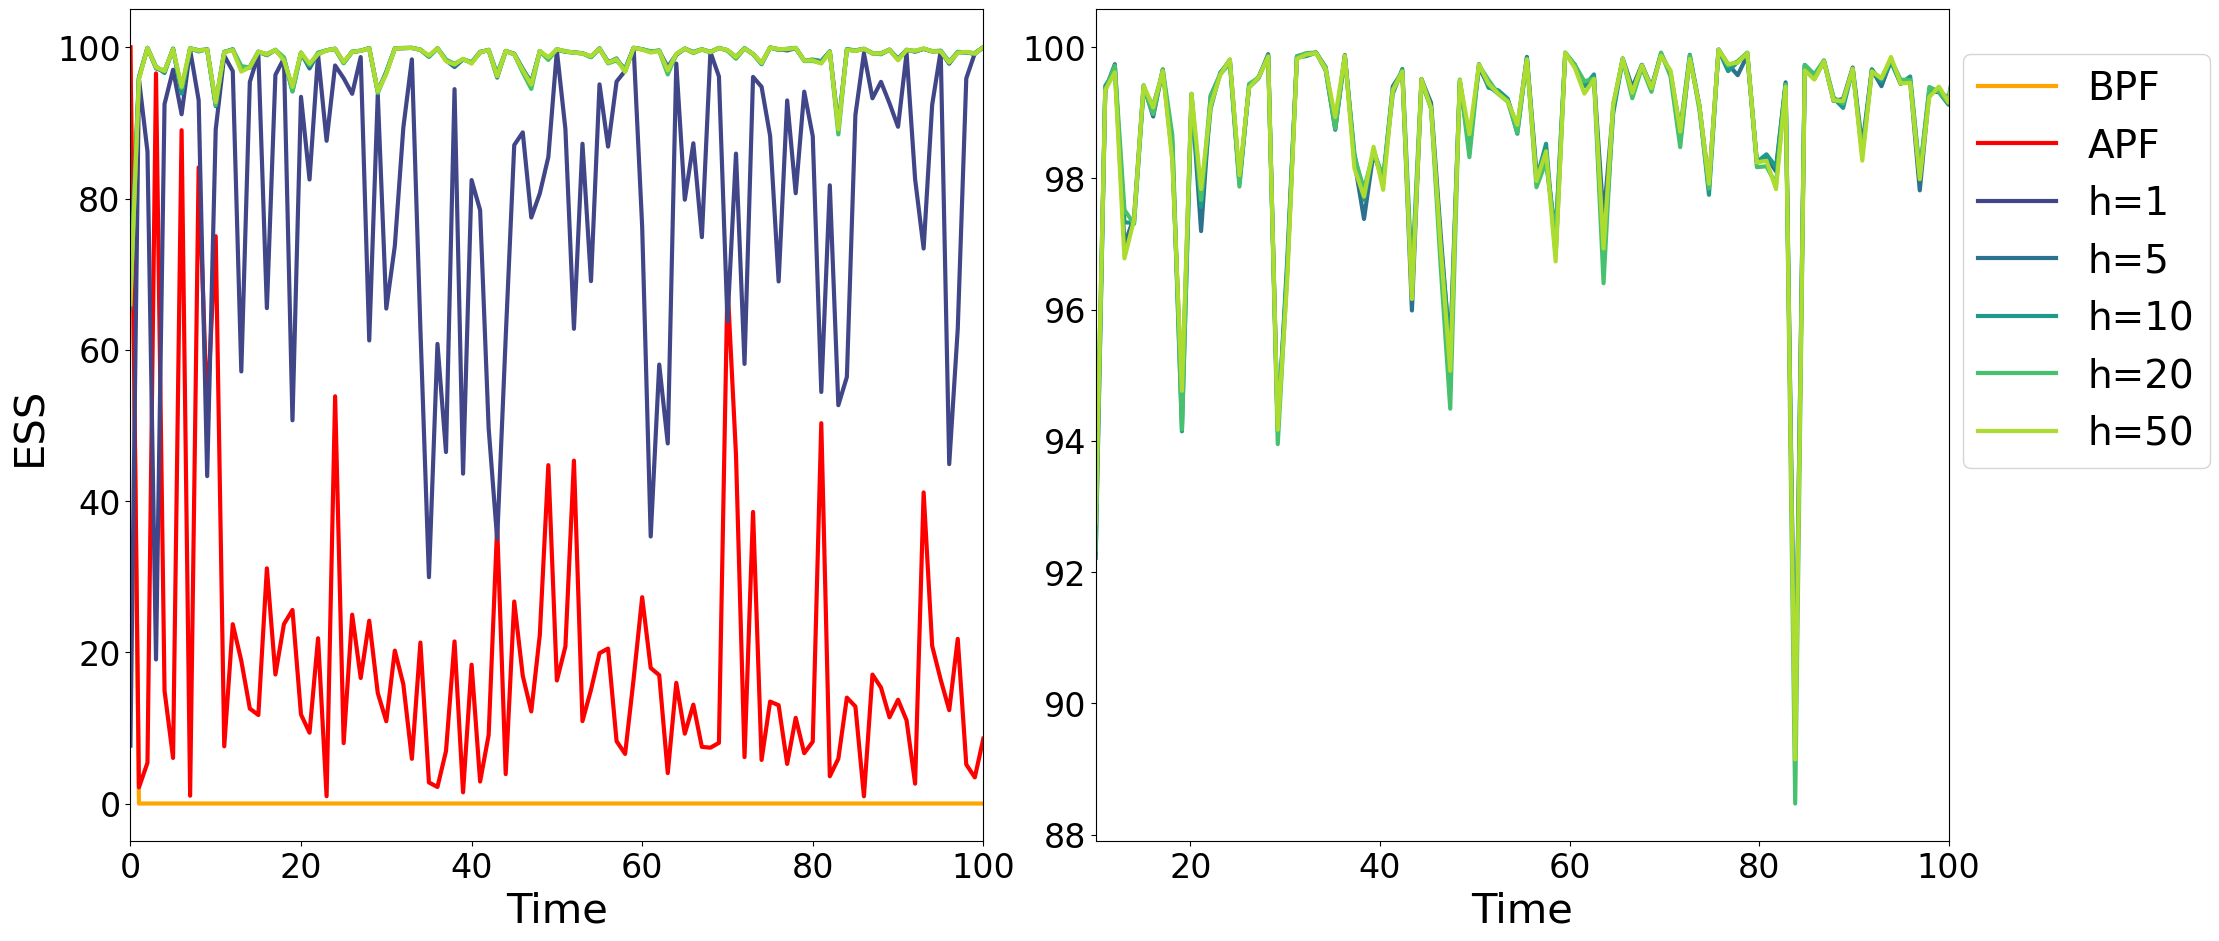

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=5)

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_xlim((0, 100))
ax[1].set_xlim((10, 100))

ax[0].set_ylabel(r"ESS", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"Time", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"Time", fontsize = 30, labelpad = 5)

for i in range(ESS_SIS_numpy.shape[0]):

    ax[0].plot(ESS_SIS_numpy[i,:], label = algorithm_list[i], color = color_list[i], linewidth = 3)
    
for i in range(3, ESS_SIS_numpy.shape[0]):

    ax[1].plot(np.linspace(10, ESS_SIS_numpy.shape[1], ESS_SIS_numpy.shape[1]-10), ESS_SIS_numpy[i,10:], color = color_list[i], linewidth = 3)

fig.legend(bbox_to_anchor=(1.1, 0.9), fontsize = 28)

# Likelihood variance experiment

In [12]:
CostTable_SIS_DGP_numpy    = np.load("Data/LikelihoodTable/CostTable_SIS_DGP_numpy.npy")
CostTable_SIS_NotDGP_numpy = np.load("Data/LikelihoodTable/CostTable_SIS_NotDGP_numpy.npy")

LikelihoodTable_SIS_DGP_numpy    = np.load("Data/LikelihoodTable/LikelihoodTable_SIS_DGP_numpy.npy")
LikelihoodTable_SIS_NotDGP_numpy = np.load("Data/LikelihoodTable/LikelihoodTable_SIS_NotDGP_numpy.npy")

In [13]:
LikelihoodTable_SIS_DGP_numpy_std    = np.nanstd(LikelihoodTable_SIS_DGP_numpy, axis =2)
LikelihoodTable_SIS_NotDGP_numpy_std = np.nanstd(LikelihoodTable_SIS_NotDGP_numpy, axis =2)

CostTable_SIS_DGP_numpy_mean    = np.mean(CostTable_SIS_DGP_numpy, axis =2)
CostTable_SIS_NotDGP_numpy_mean = np.mean(CostTable_SIS_NotDGP_numpy, axis =2)

CostTable_SIS_DGP_numpy_std    = np.std(CostTable_SIS_DGP_numpy, axis =2)
CostTable_SIS_NotDGP_numpy_std = np.std(CostTable_SIS_NotDGP_numpy, axis =2)

In [14]:
LikelihoodTable_SIS_DGP_numpy_std = LikelihoodTable_SIS_DGP_numpy_std[:, np.array([0, 4, 5, 6])]
LikelihoodTable_SIS_NotDGP_numpy_std = LikelihoodTable_SIS_NotDGP_numpy_std[:, np.array([0, 4, 5, 6])]
CostTable_SIS_DGP_numpy_mean = CostTable_SIS_DGP_numpy_mean[:, np.array([0, 4, 5, 6])]
CostTable_SIS_NotDGP_numpy_mean = CostTable_SIS_NotDGP_numpy_mean[:, np.array([0, 4, 5, 6])]
CostTable_SIS_DGP_numpy_std = CostTable_SIS_DGP_numpy_std[:, np.array([0, 4, 5, 6])]
CostTable_SIS_NotDGP_numpy_std = CostTable_SIS_NotDGP_numpy_std[:, np.array([0, 4, 5, 6])]

In [15]:
from tabulate import tabulate

In [16]:
Nx_list    = [64, 128, 256, 512, 1024, 2048]
h_list     = [5, 10, 20]

alg_cost = np.mean(CostTable_SIS_DGP_numpy_mean, axis = 0)

table = []

table_row = ["", "APF", str(round(alg_cost[0], 2))+"s"]
i =0
for h in h_list:
    i = i +1
    table_row.append("h="+ str(h))
    table_row.append(str(round(alg_cost[i], 2))+"s")

table.append(table_row)

table_row = ["", "DGP", "NDGP"]
for h in h_list:
    table_row.append("DGP")
    table_row.append("NDGP")

table.append(table_row)

table_row = ["P", "std", "std"]

for h in h_list:
    table_row.append("std")
    table_row.append("std")

table.append(table_row)

for j in range(len(Nx_list)):

    table_row = [str(Nx_list[j])]

    for i in range(LikelihoodTable_SIS_DGP_numpy_std.shape[1]):

        table_row.append(str(round(LikelihoodTable_SIS_DGP_numpy_std[j,i], 2)))
        table_row.append(str(round(LikelihoodTable_SIS_NotDGP_numpy_std[j,i], 2)))

    table.append(table_row)
    

In [17]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤═══════╤════════╤═══════╤════════╤════════╤═════════╤════════╤═════════╕
│      │ APF   │ 0.7s   │ h=5   │ 2.5s   │ h=10   │ 3.94s   │ h=20   │ 6.61s   │
╞══════╪═══════╪════════╪═══════╪════════╪════════╪═════════╪════════╪═════════╡
│      │ DGP   │ NDGP   │ DGP   │ NDGP   │ DGP    │ NDGP    │ DGP    │ NDGP    │
├──────┼───────┼────────┼───────┼────────┼────────┼─────────┼────────┼─────────┤
│ P    │ std   │ std    │ std   │ std    │ std    │ std     │ std    │ std     │
├──────┼───────┼────────┼───────┼────────┼────────┼─────────┼────────┼─────────┤
│ 64   │ 7.02  │ 10.97  │ 0.4   │ 1.26   │ 0.48   │ 1.35    │ 0.46   │ 1.19    │
├──────┼───────┼────────┼───────┼────────┼────────┼─────────┼────────┼─────────┤
│ 128  │ 4.99  │ 9.89   │ 0.3   │ 0.92   │ 0.31   │ 1.0     │ 0.37   │ 0.89    │
├──────┼───────┼────────┼───────┼────────┼────────┼─────────┼────────┼─────────┤
│ 256  │ 5.24  │ 8.3    │ 0.27  │ 0.72   │ 0.24   │ 0.67    │ 0.35   │ 0.63    │
├──────┼───────┼────────┼───

# Underreporting risk

In [18]:
LikelihoodEmission_SIS_DGP_numpy = np.load("Data/LikelihoodEmission/LikelihoodEmission_SIS_DGP_numpy.npy")
LikelihoodEmission_SIS_NotDGP_numpy = np.load("Data/LikelihoodEmission/LikelihoodEmission_SIS_NotDGP_numpy.npy")

ESSEmission_SIS_DGP_numpy = np.load("Data/LikelihoodEmission/ESSEmission_SIS_DGP_numpy.npy")
ESSEmission_SIS_NotDGP_numpy = np.load("Data/LikelihoodEmission/ESSEmission_SIS_NotDGP_numpy.npy")

In [19]:
LikelihoodEmission_SIS_DGP_numpy = LikelihoodEmission_SIS_DGP_numpy[:,np.array([0,2,4,5,6]),:]
LikelihoodEmission_SIS_NotDGP_numpy = LikelihoodEmission_SIS_NotDGP_numpy[:,np.array([0,2,4,5,6]),:]

ESSEmission_SIS_DGP_numpy = ESSEmission_SIS_DGP_numpy[:,np.array([0,2,4,5,6]),:,:]
ESSEmission_SIS_NotDGP_numpy = ESSEmission_SIS_NotDGP_numpy[:,np.array([0,2,4,5,6]),:,:]

In [20]:
LikelihoodEmission_SIS_DGP_numpy_quantile = np.quantile(LikelihoodEmission_SIS_DGP_numpy-np.nanmax(LikelihoodEmission_SIS_DGP_numpy, axis =2, keepdims=True), (0.05, 0.5, 0.95), axis =2)
LikelihoodEmission_SIS_NotDGP_numpy_quantile = np.quantile(LikelihoodEmission_SIS_NotDGP_numpy-np.nanmax(LikelihoodEmission_SIS_NotDGP_numpy, axis =2, keepdims=True), (0.05, 0.5, 0.95), axis =2)

LikelihoodEmission_SIS_DGP_numpy_std    = np.std(LikelihoodEmission_SIS_DGP_numpy, axis =2)
LikelihoodEmission_SIS_NotDGP_numpy_std = np.std(LikelihoodEmission_SIS_NotDGP_numpy, axis =2)

In [21]:
algorithm_list = ["APF"]

h_list     = [1, 5, 10, 20]
for h in h_list:
    algorithm_list.append("h="+str(h))

color_list = ["red"]

cmap = plt.get_cmap('viridis', 5*len(h_list))
for i in range(len(h_list)):
    color_list.append(cmap(5*len(h_list)-4*(len(h_list)-i)))

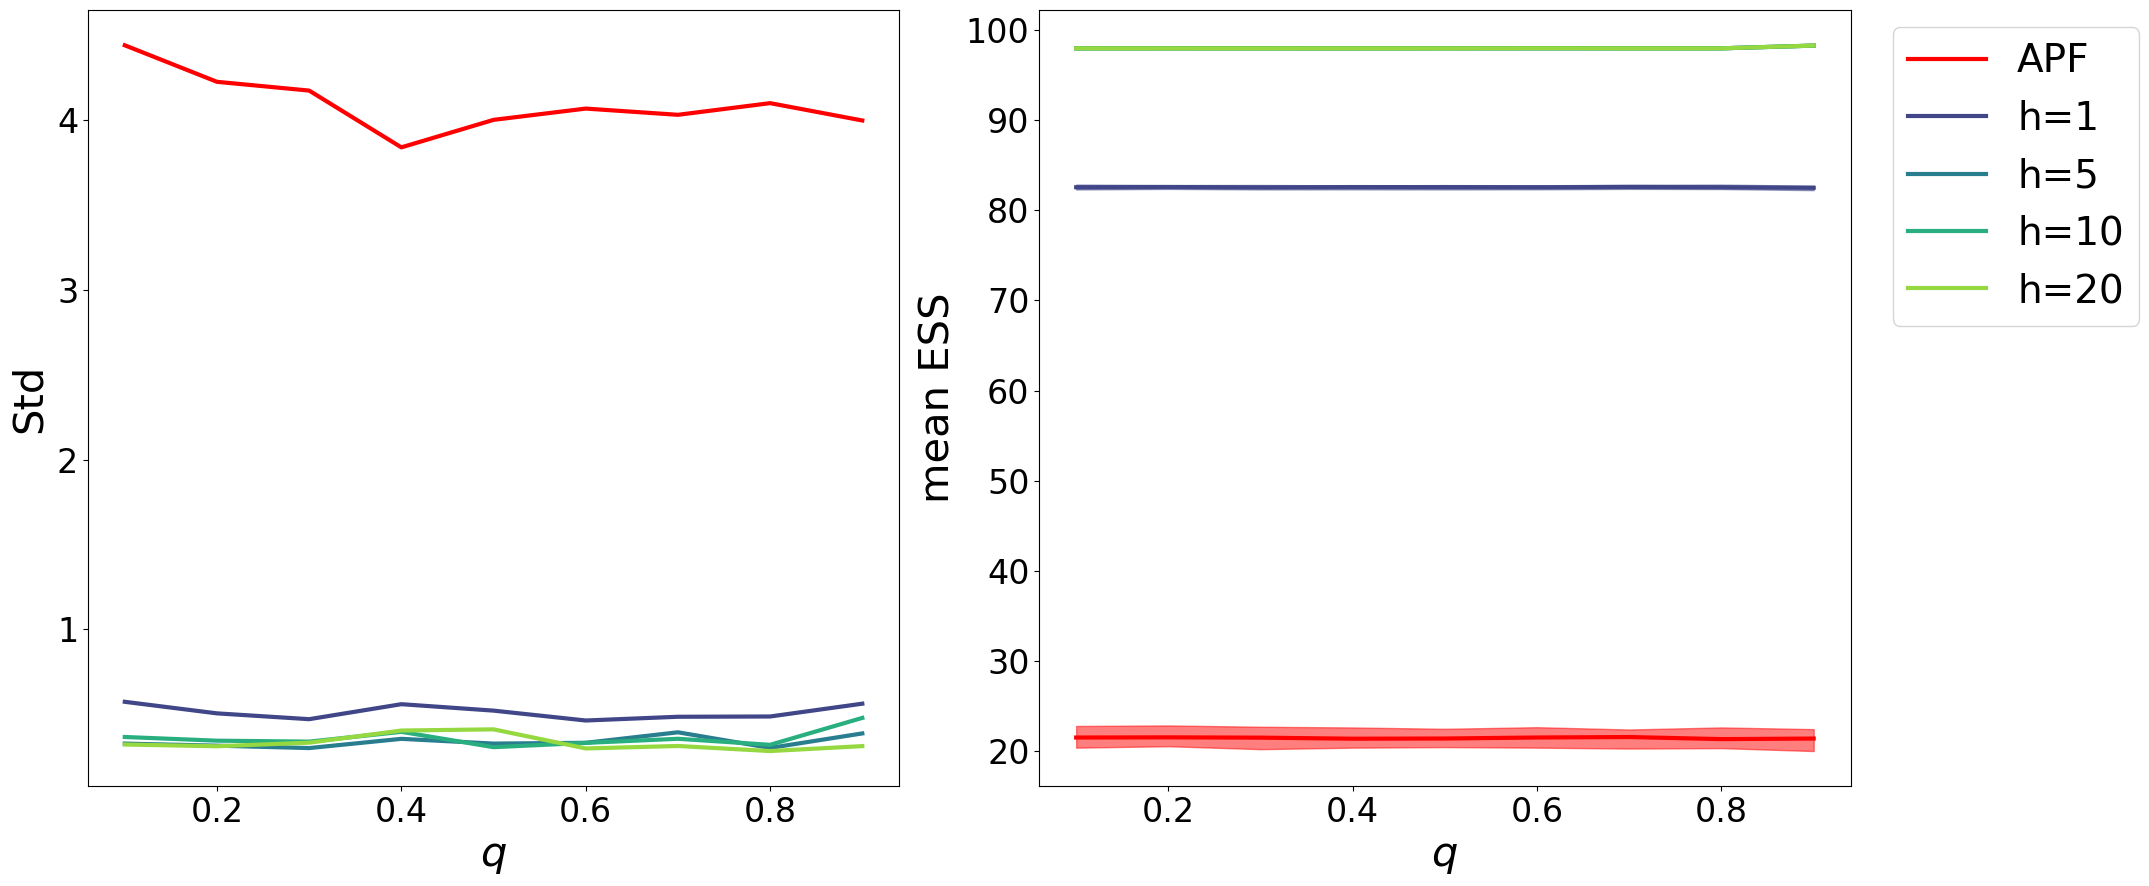

In [23]:
q_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 10), dpi = 100)
fig.tight_layout(pad=7)

ax[0].tick_params(axis='both', labelsize=24)
ax[1].tick_params(axis='both', labelsize=24)

ax[0].set_ylabel(r"Std", fontsize = 30, labelpad = 5)
ax[0].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
    
for i in range(LikelihoodEmission_SIS_NotDGP_numpy_std.shape[1]):
    
    ax[0].plot(q_list, LikelihoodEmission_SIS_NotDGP_numpy_std[:,i], color = color_list[i], label = algorithm_list[i], linewidth = 3)

ESSEmission_SIS_NotDGP_numpy_mean_quantile = np.quantile(np.mean(ESSEmission_SIS_NotDGP_numpy, axis =3), (0.05, 0.5, 0.95), axis =2)

ax[1].set_ylabel(r"mean ESS", fontsize = 30, labelpad = 5)
ax[1].set_xlabel(r"$q$", fontsize = 30, labelpad = 5)
    
for i in range(ESSEmission_SIS_NotDGP_numpy_mean_quantile.shape[2]):
    
    ax[1].plot(q_list, ESSEmission_SIS_NotDGP_numpy_mean_quantile[1,:,i], color = color_list[i], linewidth = 3)
    ax[1].fill_between(q_list, ESSEmission_SIS_NotDGP_numpy_mean_quantile[0,:,i], ESSEmission_SIS_NotDGP_numpy_mean_quantile[2,:,i], color = color_list[i], alpha = 0.5)

fig.legend(bbox_to_anchor=(1.1, 0.9), fontsize = 28)

# PMMH

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
chain5h  = np.load("Data/PMMH/PMMH_100000iter_5h.npy")
chain10h = np.load("Data/PMMH/PMMH_100000iter_10h.npy")

chain10h.shape

(8, 95400)

In [26]:
burn_in  = 10000
chain5h  = chain5h[ :,burn_in:]
chain10h = chain10h[:,burn_in:]

chain5h  = chain5h[ :,range(0, (chain5h.shape[1]), 100)]
chain10h = chain10h[:,range(0, (chain10h.shape[1]), 10)]

In [27]:
import tensorflow as tf
import tensorflow_probability as tfp

beta_0_prior      = tfp.distributions.Normal( loc = [0.,], scale = [ 3.])
beta_lambda_prior = tfp.distributions.Normal( loc = [0.,], scale = [ 3.])
beta_gamma_prior  = tfp.distributions.Normal( loc = [0.,], scale = [ 3.])
q_prior           = tfp.distributions.Uniform(low = [0.,], high  = [ 1.])

prior    = [beta_0_prior, beta_lambda_prior, beta_gamma_prior, q_prior]
linspace = [np.linspace( -9, 1, 100), np.linspace( -3, 3, 100), np.linspace( -2, 0, 100), np.linspace( 0.5, 0.9, 100)]

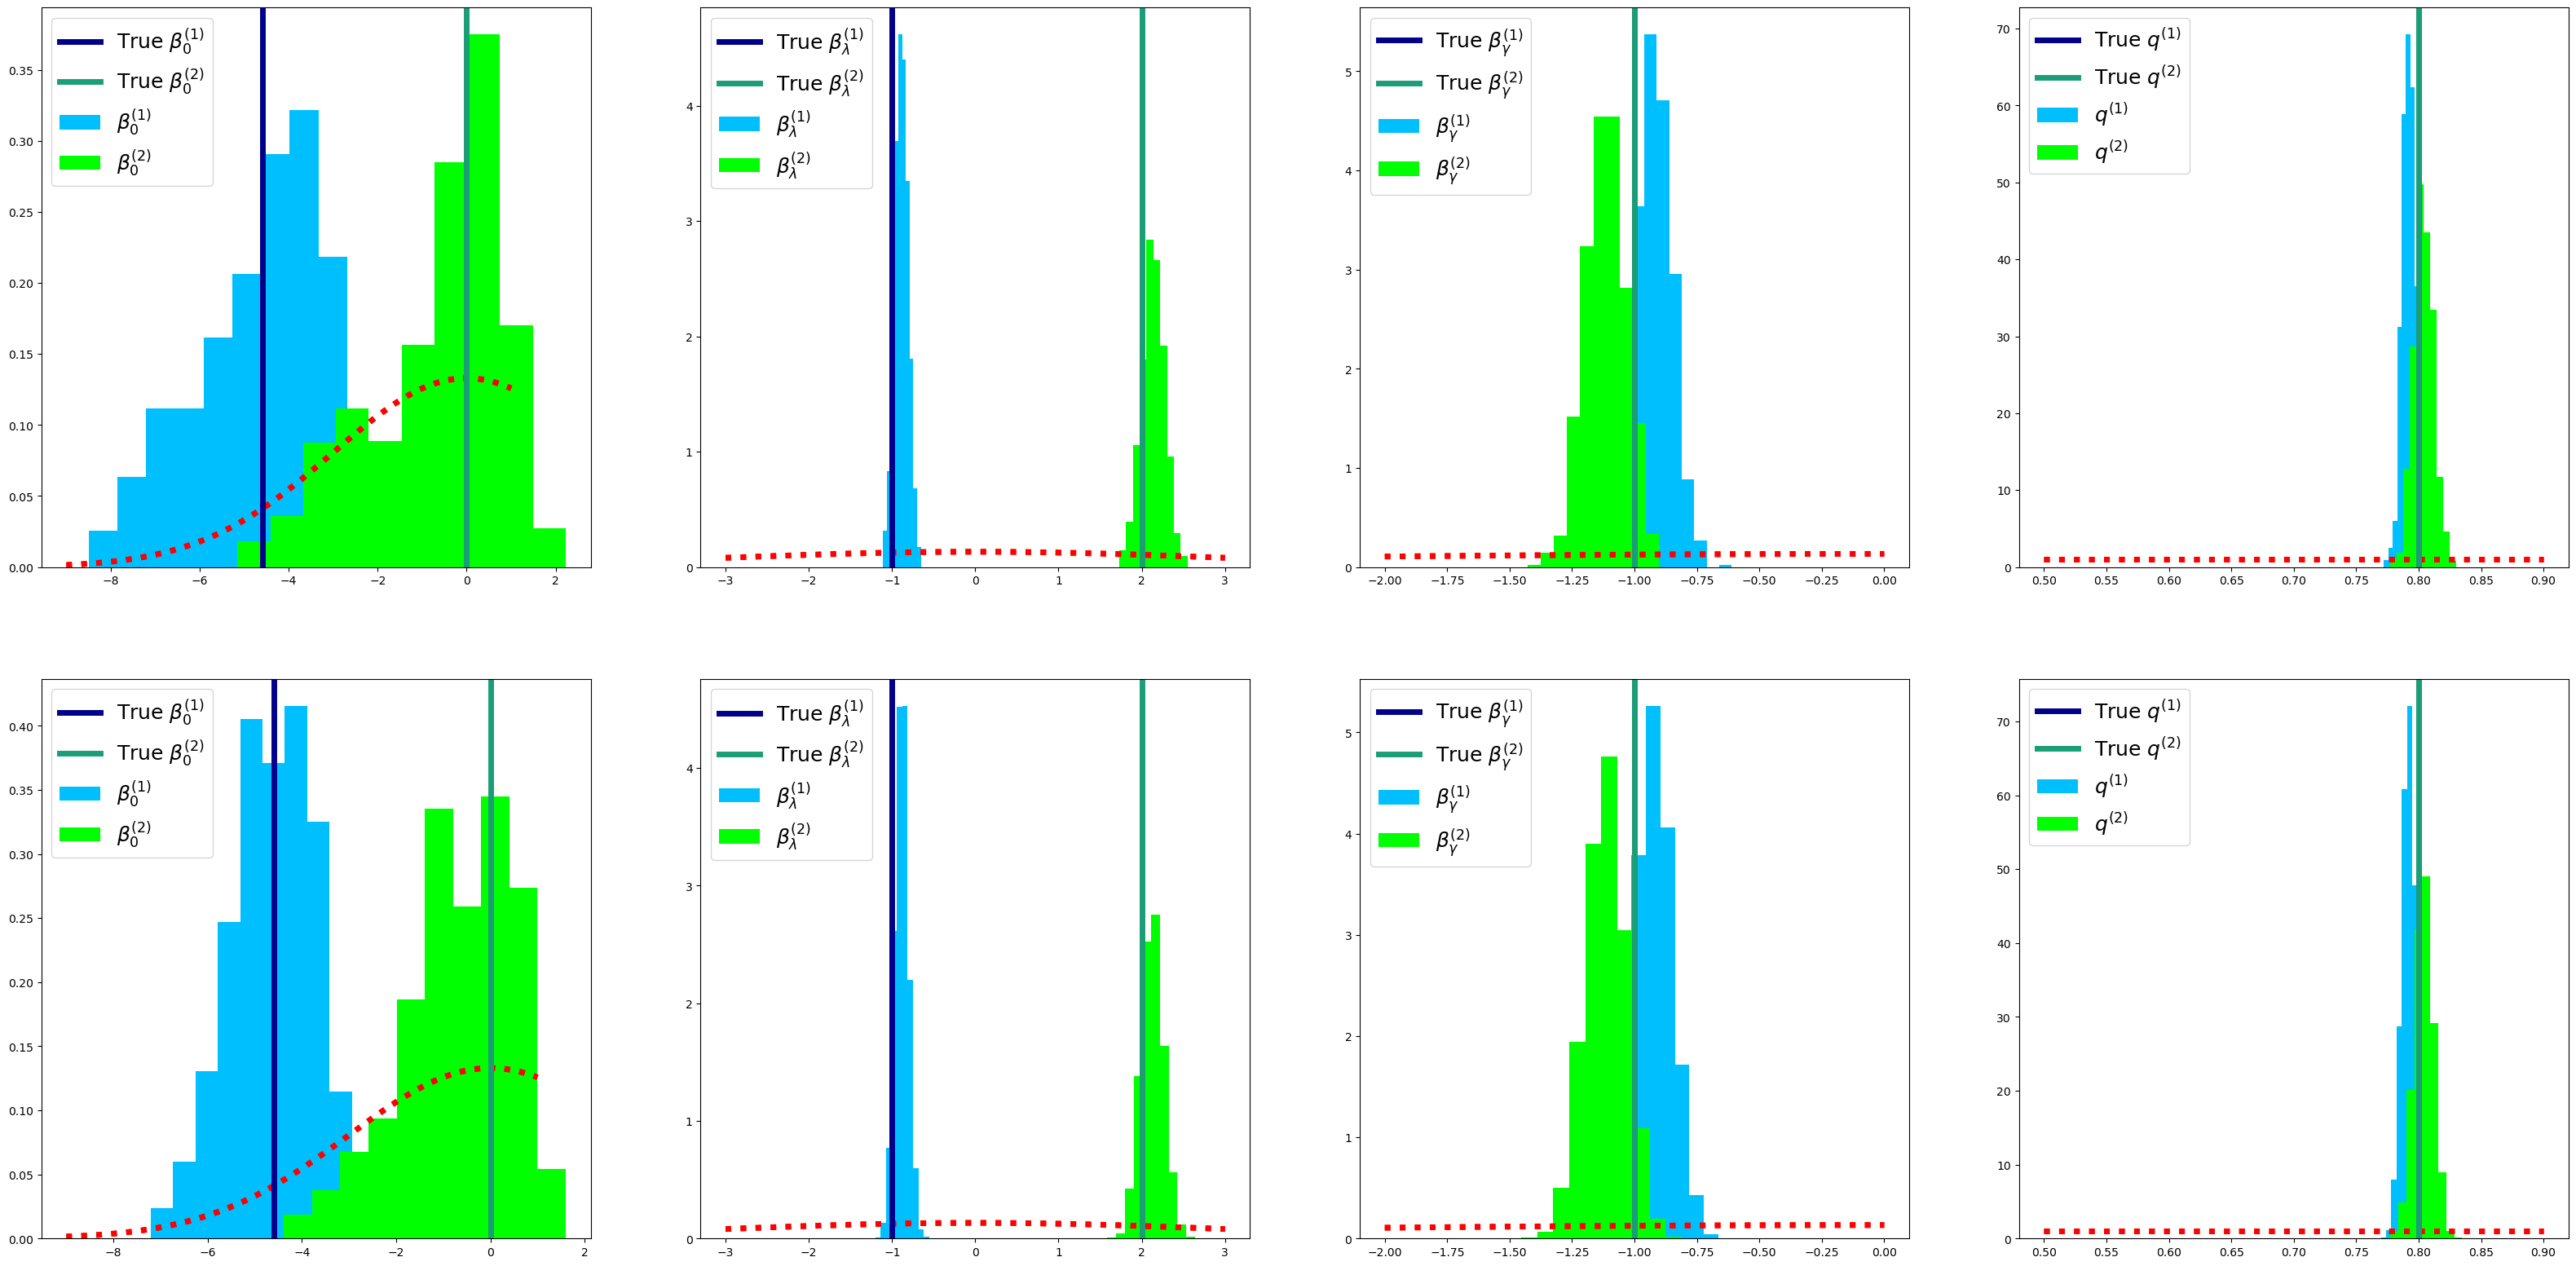

In [30]:
ground_truth = [-np.log(99), 0, -1, 2, -1, -1, 0.8, 0.8]
labels       = [r"$\beta_0^{(1)}$", r"$\beta_0^{(2)}$", r"$\beta_\lambda^{(1)}$", r"$\beta_\lambda^{(2)}$", r"$\beta_\gamma^{(1)}$", r"$\beta_\gamma^{(2)}$", r"$q^{(1)}$", r"$q^{(2)}$"] 
labels_true  = [r"True $\beta_0^{(1)}$", r"True $\beta_0^{(2)}$", r"True $\beta_\lambda^{(1)}$", r"True $\beta_\lambda^{(2)}$", r"True $\beta_\gamma^{(1)}$", r"True $\beta_\gamma^{(2)}$", r"True $q^{(1)}$", r"True $q^{(2)}$"] 

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (40, 20), dpi =100)

for j in range(4):

        ax[0,j].hist(chain5h[2*j,:],   color = "deepskyblue", label = labels[2*j], density = True)
        ax[0,j].plot(linspace[j], prior[j].prob(linspace[j]), color = "red", linestyle=':', linewidth = 5)

        ax[0,j].hist(chain5h[2*j+1,:], color = "lime", label = labels[2*j+1], density = True)
        ax[0,j].plot(linspace[j], prior[j].prob(linspace[j]), color = "red", linestyle=':', linewidth = 5)

        ax[0,j].axvline(x = ground_truth[2*j], ymin = 0, ymax = 1,   color = "darkblue", linewidth = 5, label = labels_true[2*j])
        ax[0,j].axvline(x = ground_truth[2*j+1], ymin = 0, ymax = 1, color = "#1b9e77", linewidth = 5, label = labels_true[2*j+1])
        ax[0,j].legend(fontsize = 18, loc = "upper left")

        ax[1,j].hist(chain10h[2*j,:],   color = "deepskyblue", label = labels[2*j], density = True)
        ax[1,j].plot(linspace[j], prior[j].prob(linspace[j]), color = "red", linestyle=':', linewidth = 5)

        ax[1,j].hist(chain10h[2*j+1,:], color = "lime", label = labels[2*j+1], density = True)
        ax[1,j].plot(linspace[j], prior[j].prob(linspace[j]), color = "red", linestyle=':', linewidth = 5)

        ax[1,j].axvline(x = ground_truth[2*j], ymin = 0, ymax = 1,   color = "darkblue", linewidth = 5, label = labels_true[2*j])
        ax[1,j].axvline(x = ground_truth[2*j+1], ymin = 0, ymax = 1, color = "#1b9e77", linewidth = 5, label = labels_true[2*j+1])
        ax[1,j].legend(fontsize = 18, loc = "upper left")

In [31]:
beta_0 = chain5h[:2,:]
beta_lambda = chain5h[2:4,:]
beta_gamma = chain5h[4:6,:]

beta_0_true = np.array([-np.log(99), 0]).reshape(2,1)
beta_lambda_true = np.array([-1, 2]).reshape(2,1)
beta_gamma_true = np.array([-1, -1]).reshape(2,1)


In [32]:
W = np.load("Data/Input/W_SIS.npy")
W_sort = tf.gather(W, np.argsort(W[:,1]), axis =0)

lambda_n = 1/(1+np.exp(-np.dot(W_sort, beta_lambda)))
gamma_n  = 1/(1+np.exp(-np.dot(W_sort, beta_gamma)))

R_0 = lambda_n/gamma_n

lambda_n_true = 1/(1+np.exp(-np.dot(W_sort, beta_lambda_true)))
gamma_n_true  = 1/(1+np.exp(-np.dot(W_sort, beta_gamma_true)))

R_0_true = (lambda_n_true/gamma_n_true).squeeze()

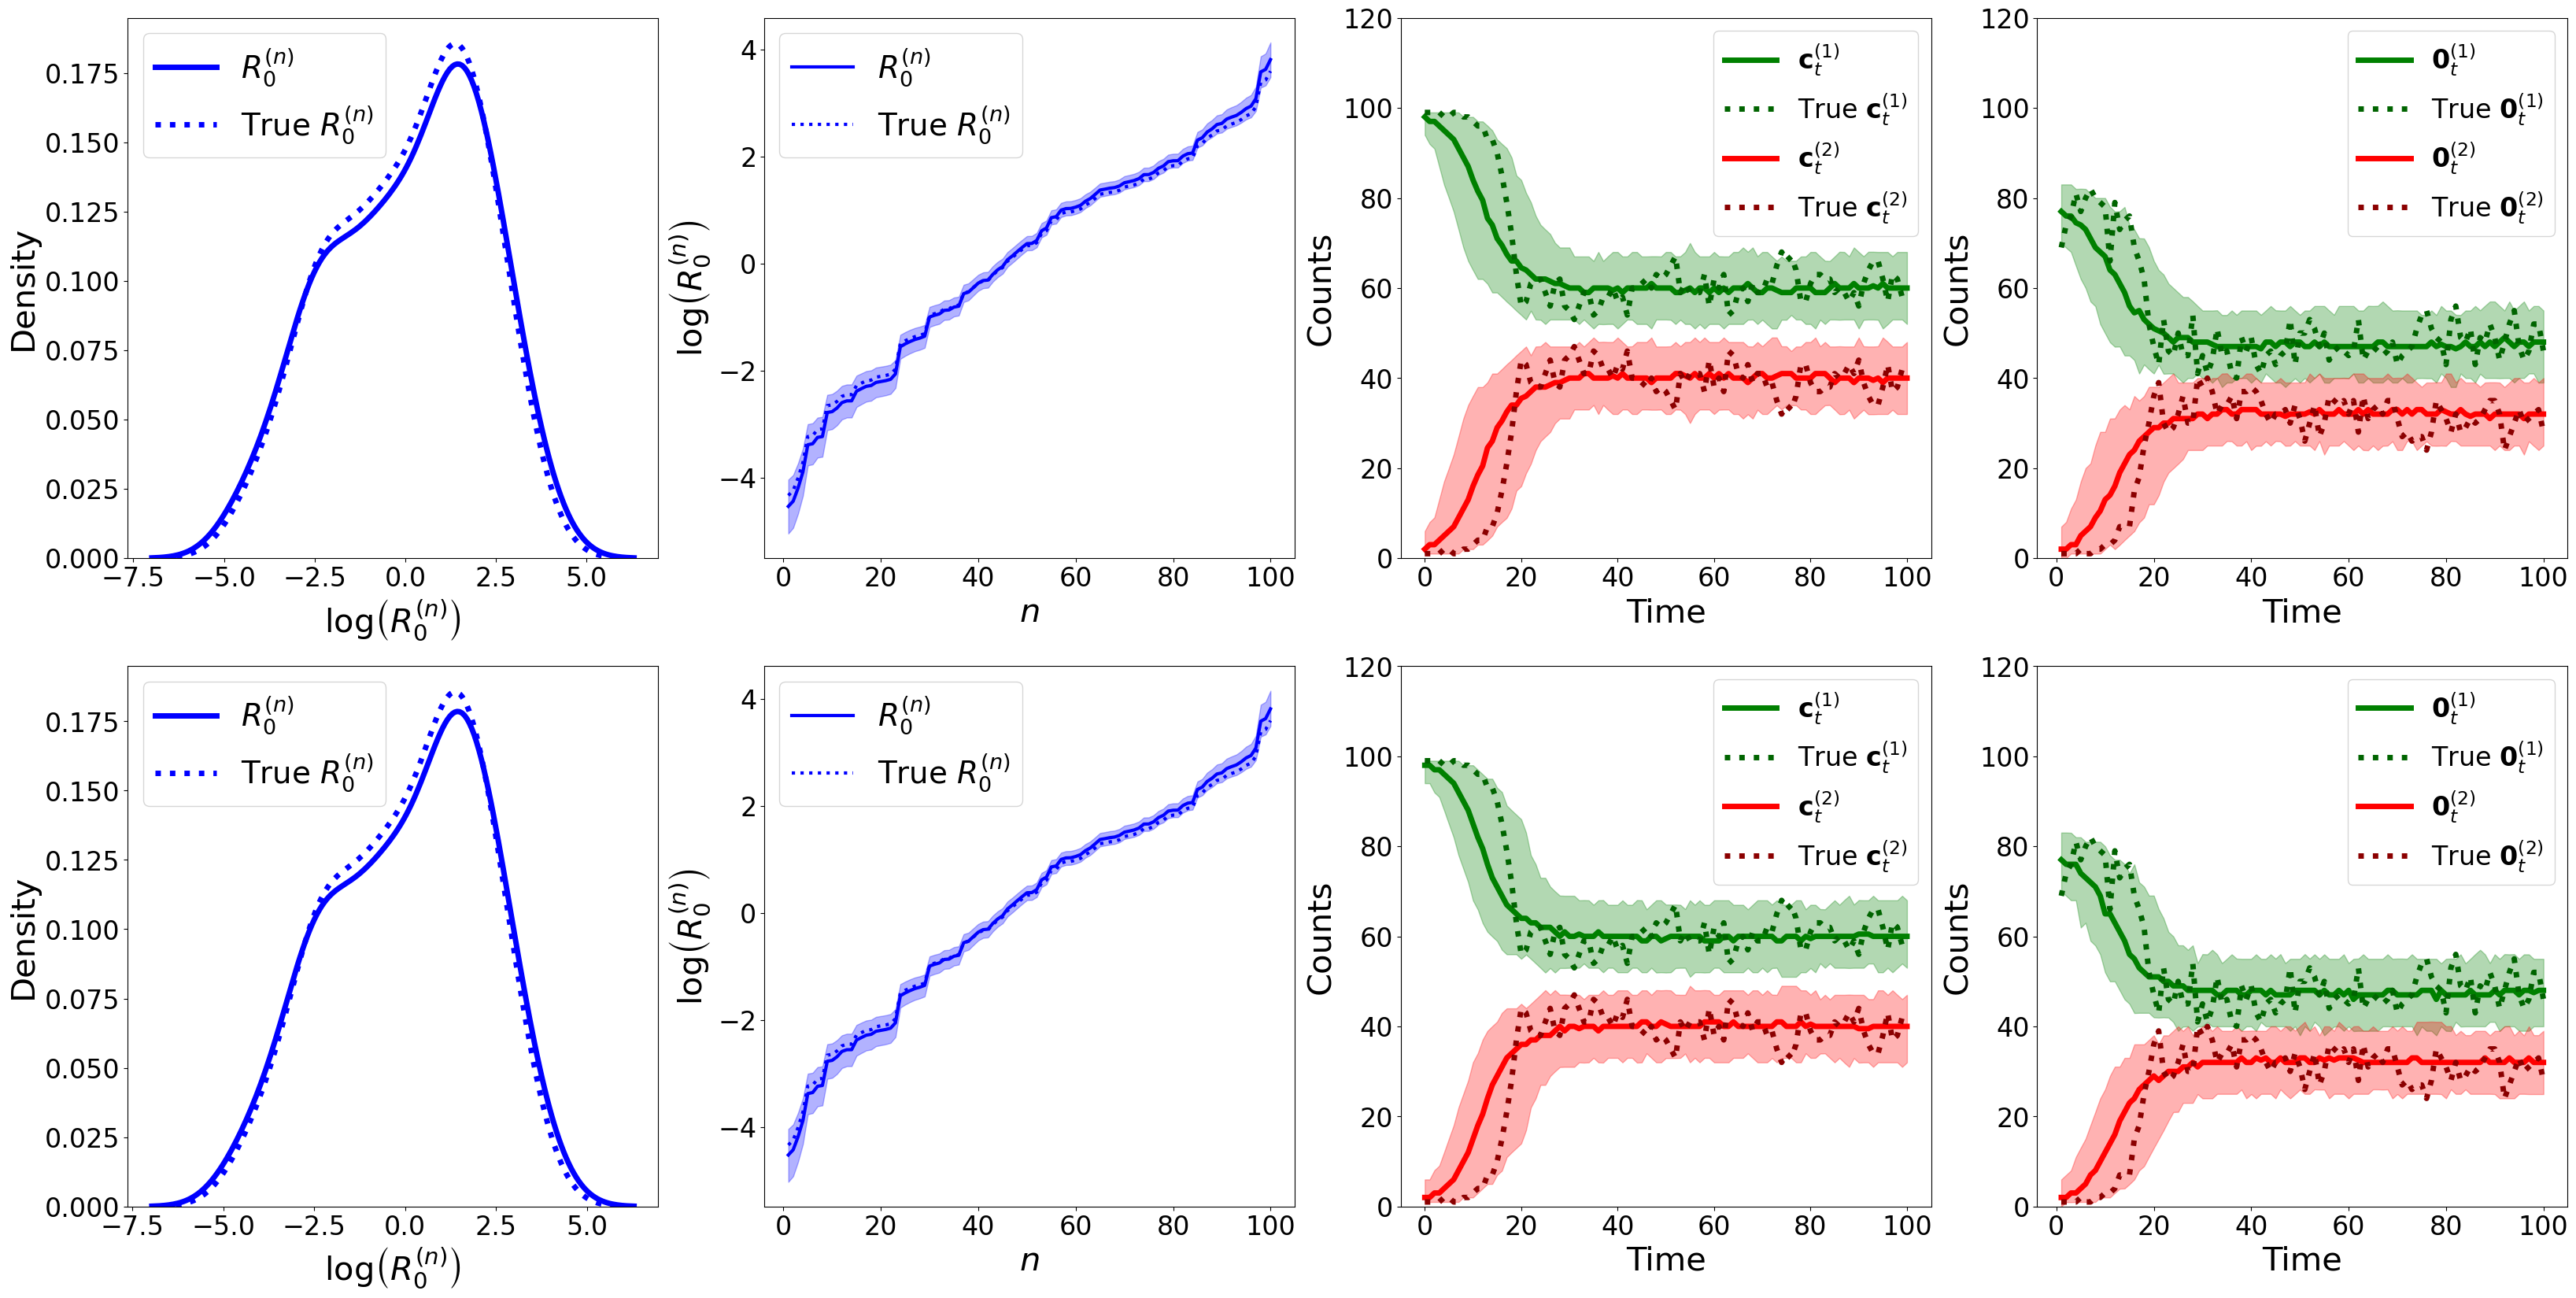

In [33]:
import seaborn as sb

chain = [chain5h, chain10h]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (40, 20), dpi =100)

x_first = [r"$\log \left (R_0^{(n)} \right )$", r"$n$"]
x_second = [r"Time", r"Time"]

y_first = [r"Density", r"$\log \left (R_0^{(n)} \right )$"]
y_second = [r"Counts", r"Counts"]

for i in range(2):

    ax[i, 0].tick_params(axis='both', labelsize=24)

    ax[i, 0].set_xlabel(x_first[0], fontsize = 30, labelpad = 5)
    ax[i, 0].set_ylabel(y_first[0], fontsize = 30, labelpad = 5)


    ax[i, 1].tick_params(axis='both', labelsize=24)

    ax[i, 1].set_xlabel(x_first[1], fontsize = 30, labelpad = 5)
    ax[i, 1].set_ylabel(y_first[1], fontsize = 30, labelpad = 5)


    beta_0 = chain[i][:2,:]
    beta_lambda = chain[i][2:4,:]
    beta_gamma = chain[i][4:6,:]

    beta_0_true = np.array([-np.log(99), 0]).reshape(2,1)
    beta_lambda_true = np.array([-1, 2]).reshape(2,1)
    beta_gamma_true = np.array([-1, -1]).reshape(2,1)

    W = np.load("Data/Input/W_SIS.npy")
    W_sort = tf.gather(W, np.argsort(W[:,1]), axis =0)

    lambda_n = 1/(1+np.exp(-np.dot(W_sort, beta_lambda)))
    gamma_n  = 1/(1+np.exp(-np.dot(W_sort, beta_gamma)))

    R_0 = lambda_n/gamma_n

    lambda_n_true = 1/(1+np.exp(-np.dot(W_sort, beta_lambda_true)))
    gamma_n_true  = 1/(1+np.exp(-np.dot(W_sort, beta_gamma_true)))

    R_0_true = (lambda_n_true/gamma_n_true).squeeze()

    sb.kdeplot(np.log(np.mean(R_0, axis =1)), fill = False, ax = ax[i, 0], color = "blue", linewidth = 5, label = r"$R_0^{(n)}$")
    sb.kdeplot(np.log(R_0_true), fill = False, ax = ax[i, 0], color = "blue", linestyle = "dotted", linewidth = 5, label = r"True $R_0^{(n)}$")
    ax[i, 0].legend(fontsize = 28)

    R_0_quant = np.quantile(R_0, (0.025, 0.5, 0.975), axis = 1)

    n_index = np.linspace(1, 100, 100)
    ax[i, 1].plot(n_index, np.log(R_0_quant[1,:]), color = "blue", linewidth = 3, label = r"$R_0^{(n)}$")
    ax[i, 1].fill_between(n_index, np.log(R_0_quant[0,:]), np.log(R_0_quant[2,:]), color = "blue", alpha = 0.3)
    ax[i, 1].plot(n_index, np.log(R_0_true), color = "blue", linestyle = "dotted", linewidth = 3, label = r"True $R_0^{(n)}$")
    ax[i, 1].legend(fontsize = 28)


C_true = np.load("Data/Input/C_SIS.npy")
Y_true = np.load("Data/Input/Y_SIS.npy")

T = 100
M = 2
N = 100

h = [5, 10]
for r in range(2):

    ax[r, 2+0].set_ylim((0,120))
    ax[r, 2+1].set_ylim((0,120))

    ax[r, 2+0].tick_params(axis='both', labelsize=24)

    ax[r, 2+0].set_xlabel(x_second[0], fontsize = 30, labelpad = 5)
    ax[r, 2+0].set_ylabel(y_second[0], fontsize = 30, labelpad = 5)


    ax[r, 2+1].tick_params(axis='both', labelsize=24)

    ax[r, 2+1].set_xlabel(x_second[1], fontsize = 30, labelpad = 5)
    ax[r, 2+1].set_ylabel(y_second[1], fontsize = 30, labelpad = 5)

    sum_C_posterior_pred = np.load("Data/Output/sum_C_posterior_pred_"+str(h[r])+".npy")
    sum_Y_posterior_pred = np.load("Data/Output/sum_Y_posterior_pred_"+str(h[r])+".npy")

    sum_C_posterior_pred_quant = np.nanquantile(sum_C_posterior_pred, (0.05, 0.5, 0.95), axis = 0)
    sum_Y_posterior_pred_quant = np.nanquantile(sum_Y_posterior_pred, (0.05, 0.5, 0.95), axis = 0)

    time = np.linspace(0, T, T+1)

    color_true = ["darkgreen", "darkred"]
    color      = ["green", "red"]

    label_c = [r"$\mathbf{c}_t^{(1)}$", r"$\mathbf{c}_t^{(2)}$"]
    for i in range(M):
        ax[r, 2+0].plot(time, sum_C_posterior_pred_quant[1, i, :], color = color[i], linewidth = 5, label = label_c[i])
        ax[r, 2+0].fill_between(time, sum_C_posterior_pred_quant[0, i, :], sum_C_posterior_pred_quant[2, i, :], color = color[i], alpha = 0.3)

        ax[r, 2+0].plot(time, np.sum(C_true, axis =0)[i, :], color = color_true[i], linestyle = ":", linewidth = 5, label = "True "+label_c[i])
        ax[r, 2+0].legend(fontsize = 24)
          
    label_o = [r"$\mathbf{0}_t^{(1)}$", r"$\mathbf{0}_t^{(2)}$"]
    for i in range(M):
        ax[r, 2+1].plot(time[1:], sum_Y_posterior_pred_quant[1, i, 1:], color = color[i], linewidth = 5, label = label_o[i])
        ax[r, 2+1].fill_between(time[1:], sum_Y_posterior_pred_quant[0, i, 1:], sum_Y_posterior_pred_quant[2, i, 1:], color = color[i], alpha = 0.3)

        ax[r, 2+1].plot(time[1:], np.sum(Y_true, axis =0)[i, 1:], color = color_true[i], linestyle = ":", linewidth = 5, label = "True "+label_o[i])
        ax[r, 2+1].legend(fontsize = 24)

# Likelihood grid

In [34]:
loglikelihood_lambda = np.load("Data/LikelihoodGrid/loglikelihood_lambda.npy")
loglikelihood_gamma  = np.load("Data/LikelihoodGrid/loglikelihood_gamma.npy")

loglikelihood_lambda = loglikelihood_lambda - np.nanmax(np.nanmax(loglikelihood_lambda, axis =0, keepdims=True), axis =1, keepdims=True)
loglikelihood_gamma  = loglikelihood_gamma  -np.nanmax(np.nanmax(loglikelihood_gamma, axis =0, keepdims=True), axis =1, keepdims=True)

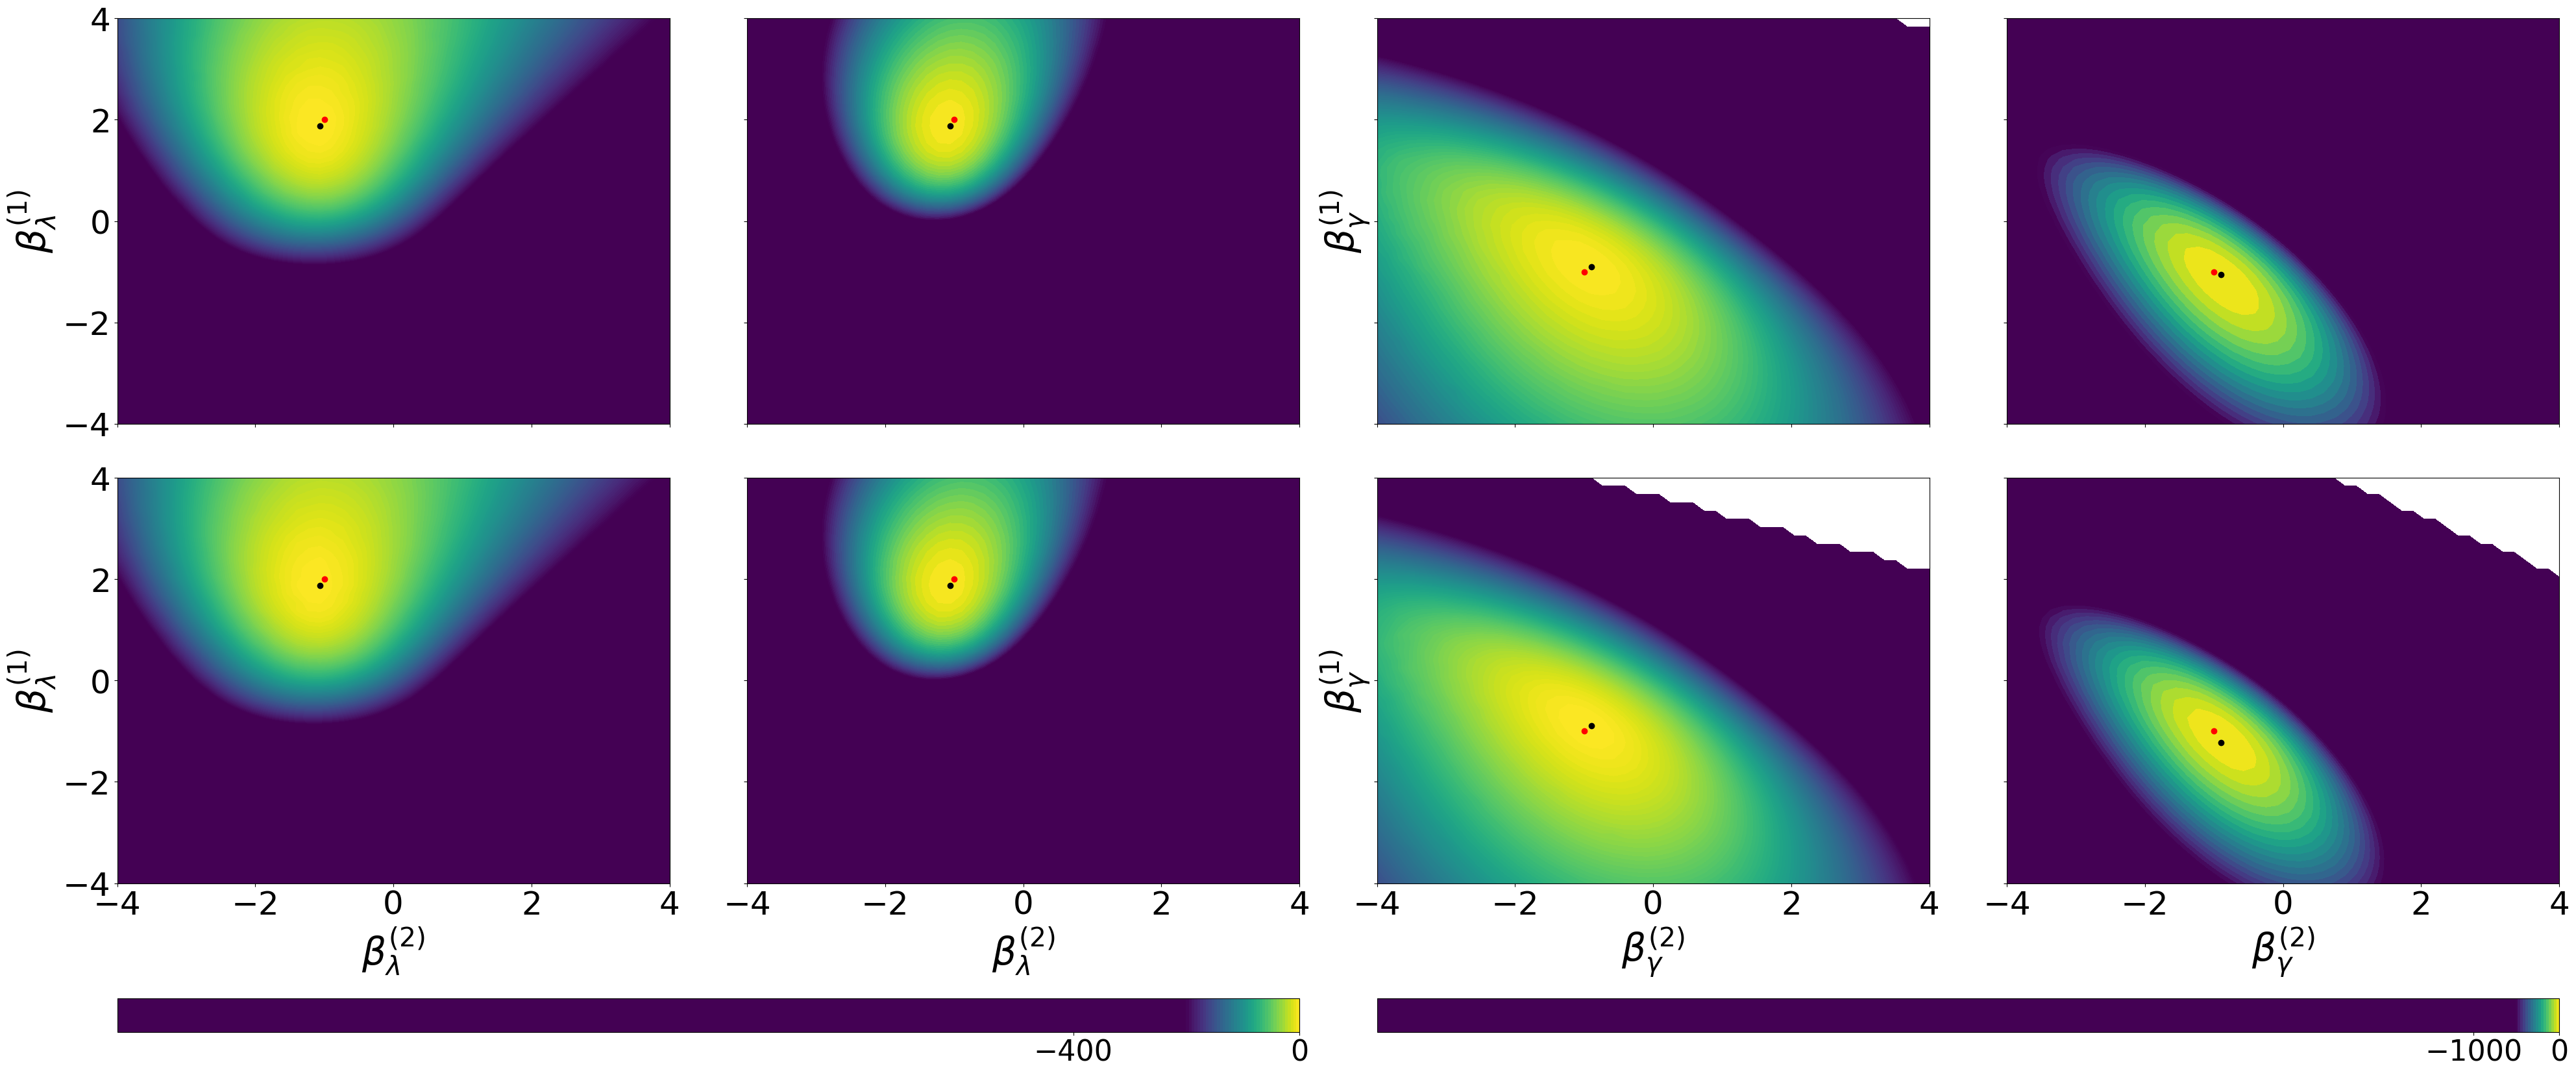

In [35]:
time = [50, 100]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (40, 20), sharey = True, sharex =True, dpi = 100)

fig.tight_layout(pad=7)

beta_lambda_grid = np.linspace(-4, 4, 50)
beta_gamma_grid  = np.linspace(-4, 4, 50)

X = np.zeros((50, 50))
Y = np.zeros((50, 50))

for i in range(loglikelihood_lambda.shape[0]):

    for j in range(loglikelihood_lambda.shape[1]):

        X[i,j] = beta_lambda_grid[i]
        Y[i,j] = beta_lambda_grid[j]

for r in range(2):
    for c in range(2):
        Z = loglikelihood_lambda[:,:,c+1,r]
        
        # plots contour lines
        contourf_ = ax[r,c].contourf(X, Y, Z, levels=500, vmin = -200, vmax = 0)
        ax[r,c].scatter([-1], [2], color = "red")

        i,j = np.where((Z == np.max(Z)))
        ax[r,c].scatter([X[i,j]], [Y[i,j]], color = "black")

        ax[r,c].tick_params(axis='both', labelsize=36)

        if c==0:
            ax[r,c].set_ylabel(r"$\beta_\lambda^{(1)}$", fontsize = 42, labelpad = 5)
        
        if r==1:
            ax[r,c].set_xlabel(r"$\beta_\lambda^{(2)}$", fontsize = 42, labelpad = 5)

        if r == 0 and c==1:
            cbar = fig.colorbar(contourf_, ax=ax[:,0:2], shrink=1, orientation= "horizontal", pad = 0.1, aspect=35)#, cax = ax[1,0:2])
            cbar.set_ticks([0, -400])
            cbar.ax.tick_params(labelsize= 32)


for r in range(2):
    for c in range(2):
        Z = loglikelihood_gamma[:,:,c+1,r]
        
        # plots contour lines
        contourf_ = ax[r,c+2].contourf(X, Y, Z, levels=500, vmin = -500, vmax = 0)
        ax[r,c+2].scatter([-1], [-1], color = "red")

        i,j = np.where((Z == np.nanmax(Z)))
        ax[r,c+2].scatter([X[i,j]], [Y[i,j]], color = "black")

        ax[r,c+2].tick_params(axis='both', labelsize=36)

        if c==0:
            ax[r,c+2].set_ylabel(r"$\beta_\gamma^{(1)}$", fontsize = 42, labelpad = 5)
        if r==1:
            ax[r,c+2].set_xlabel(r"$\beta_\gamma^{(2)}$", fontsize = 42, labelpad = 5)

        if r == 0 and c==1:
            cbar = fig.colorbar(contourf_, ax=ax[:,2:], shrink=1, orientation= "horizontal", pad = 0.1, aspect=35)#, cax = ax[1,2:])
            cbar.set_ticks([0., -1000])
            cbar.ax.tick_params(labelsize= 32)